<a href="https://colab.research.google.com/github/rodrigowe1988/Data-Science-na-Pratica/blob/main/An%C3%A1lise_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama da Covid-19 no mundo


<img src="https://s3.static.brasilescola.uol.com.br/be/2021/02/covid-19.jpg">

Após mais de um ano após a primeira quarentena (período esse que muitos achavam que duraria não mais de duas semanas), o coronavírus mudou completamente a rotina de todas as pessoas do mundo. 

Mesmo após a obtenção da vacina, temos muito trabalho ainda pela frente. A distribuição das doses em muitas partes do globo são impossibilitadas por n fatores: logística, má administração pública, descrença da eficácia do tratamento antecipado,... Ou seja, temos um longo caminho a percorrer.

Dentre os principais sintomas dessa doença, temos: 

* Sintomas mais comuns:
  * febre
  * tosse seca
  * cansaço
* Sintomas menos comuns:
  * dores e desconfortos
  * dor de garganta
  * diarreia
  * conjuntivite
  * dor de cabeça
  * perda de paladar ou olfato
  * erupção cutânea na pele ou descoloração dos dedos das mãos ou dos pés

##Por existirem tantas dúvidas acerca desse assunto, decidi criar um artigo através do banco de dados OWID retirado do repositório do github. Para ser estudado por qualquer pessoa e para aperfeiçoamento próprio de quem vos fala.


##Importando os dados 

Dados importados através do repositório do link abaixo:

[Repositório Github](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv)

*Atualizado até 06/04/2021 nesse artigo, porém os dados desse repositório são atualizados diariamente.


In [34]:
'''importando bibliotecas separadamente, caso precise de mais alguma, 
somente adicionar nesse campo'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#adicionando o DataFrame à variável df para manipulá-lo com mais facilidade
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [20]:
#mostrar as variáveis(colunas) do DataFrame
display(df.dtypes)

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

In [13]:
#quantidade de linhas(entradas) e colunas(variáveis)
df.shape
print(f'Nesse DataFrame encontramos {df.shape[0]}(linhas) entradas de dados alocadas em {df.shape[1]} variáveis(colunas).')

Nesse DataFrame encontramos 79667(linhas) entradas de dados alocadas em 59 variáveis(colunas).


##Dados faltantes

É comum ao trabalharmos com banco de dados de qualquer natureza encontrarmos dados faltantes e esse caso não é diferente. Nesse caso já multipliquei os valores do resultado por 100 para ter a porcentagem exata que cada coluna tem de dados faltantes.

* Note que muitas das variáveis ficam próximas (outras ultrapassam) a marca dos 90% de dados faltantes. Isso ocorre por diversos motivos. Um dos principais é a criação de novos campos no dataframe ao longo do tempo. 



In [17]:
#descobrindo quantas colunas estão com dados não preencidos
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

weekly_icu_admissions                    99.088707
weekly_icu_admissions_per_million        99.088707
weekly_hosp_admissions                   98.324275
weekly_hosp_admissions_per_million       98.324275
people_fully_vaccinated                  94.847302
people_fully_vaccinated_per_hundred      94.847302
new_vaccinations                         93.130154
people_vaccinated                        92.684549
people_vaccinated_per_hundred            92.684549
total_vaccinations                       91.901289
total_vaccinations_per_hundred           91.901289
icu_patients_per_million                 89.577868
icu_patients                             89.577868
hosp_patients                            87.518044
hosp_patients_per_million                87.518044
new_vaccinations_smoothed_per_million    87.270765
new_vaccinations_smoothed                87.270765
total_tests                              54.417764
total_tests_per_thousand                 54.417764
new_tests_per_thousand         

In [19]:
#transformar a coluna date no formato datetime
df.date = pd.to_datetime(df.date)

##Visualizar dados no DataFrame

Nas duas linhas de código abaixo temos o df alinhado de forma decrescente, alinhando no primeiro caso pelo número total de casos (**total_cases**) e no segundo pelo número total de mortes (**total_deaths**).

* note que as primeiras entradas são a mundial(WRL), América do Norte(NAM) e Europa(EUR);

In [27]:
#alinhando pelo total de casos
df.loc[df.date == '2021-04-04'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
78538,OWID_WRL,NaN,World,2021-04-04,131321563.0,551956.0,590804.429,2852987.0,6858.0,9866.857,16847.332,70.811,75.795,366.012,0.880,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665443152.0,370914794.0,144511741.0,11764956.0,16148870.0,8.54,4.76,1.85,2072.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
24600,OWID_EUR,NaN,Europe,2021-04-04,40668575.0,199224.0,202900.571,928234.0,2487.0,3424.714,54320.366,266.100,271.011,1239.827,3.322,4.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135396769.0,99341679.0,35857125.0,628901.0,2564762.0,18.08,13.27,4.79,3426.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52800,OWID_NAM,NaN,North America,2021-04-04,35424071.0,41662.0,75462.857,810480.0,418.0,1236.286,59830.660,70.366,127.455,1368.887,0.706,2.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182966469.0,121846371.0,63649150.0,3529951.0,3642841.0,30.90,20.58,10.75,6153.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75952,USA,North America,United States,2021-04-04,30706126.0,34282.0,63283.000,555001.0,222.0,792.429,92767.010,103.570,191.186,1676.727,0.671,2.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165053746.0,106214924.0,61416536.0,3365324.0,3084436.0,49.35,31.76,18.36,9223.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
4152,OWID_ASI,NaN,Asia,2021-04-04,29349014.0,224608.0,191325.286,434298.0,1672.0,1440.000,6325.427,48.408,41.235,93.602,0.360,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293398415.0,111050362.0,30705561.0,7250663.0,8777316.0,6.32,2.39,0.66,1892.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76875,VUT,Oceania,Vanuatu,2021-04-04,3.0,0.0,0.000,NaN,NaN,0.000,9.767,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,3.071500e+05,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.800,34.500,25.209,NaN,70.47,0.609
46767,FSM,Oceania,Micronesia (country),2021-04-04,1.0,0.0,0.000,NaN,NaN,0.000,8.694,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150210e+05,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620
31881,HKG,Asia,Hong Kong,2021-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [26]:
#alinhando pelo número de mortes
df.loc[df.date == '2021-04-04'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
78538,OWID_WRL,NaN,World,2021-04-04,131321563.0,551956.0,590804.429,2852987.0,6858.0,9866.857,16847.332,70.811,75.795,366.012,0.880,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665443152.0,370914794.0,144511741.0,11764956.0,16148870.0,8.54,4.76,1.85,2072.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
24600,OWID_EUR,NaN,Europe,2021-04-04,40668575.0,199224.0,202900.571,928234.0,2487.0,3424.714,54320.366,266.100,271.011,1239.827,3.322,4.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135396769.0,99341679.0,35857125.0,628901.0,2564762.0,18.08,13.27,4.79,3426.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52800,OWID_NAM,NaN,North America,2021-04-04,35424071.0,41662.0,75462.857,810480.0,418.0,1236.286,59830.660,70.366,127.455,1368.887,0.706,2.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182966469.0,121846371.0,63649150.0,3529951.0,3642841.0,30.90,20.58,10.75,6153.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25039,OWID_EUN,NaN,European Union,2021-04-04,27437350.0,167010.0,161568.714,626064.0,1725.0,2428.000,61668.183,375.372,363.142,1407.141,3.877,5.457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80183390.0,56462452.0,23719304.0,378898.0,1511823.0,18.02,12.69,5.33,3398.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66545,OWID_SAM,NaN,South America,2021-04-04,21569264.0,76525.0,108576.143,565109.0,2008.0,3486.429,50072.605,177.651,252.057,1311.889,4.662,8.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40976781.0,30872527.0,10104254.0,170961.0,888014.0,9.51,7.17,2.35,2062.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,WSM,Oceania,Samoa,2021-04-04,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715
65326,SLB,Oceania,Solomon Islands,2021-04-04,19.0,0.0,0.143,NaN,NaN,0.000,27.661,0.000,0.208,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
72222,TLS,Asia,Timor,2021-04-04,714.0,0.0,31.857,NaN,NaN,0.000,541.548,0.000,24.163,NaN,NaN,0.000,NaN,NaN,NaN,NaN,

###Em relação à variável número de mortes, temos os seguintes indicadores:

* Mundo - 2.852.987 
* Europa - 928.234 
* América do Norte - 810.480
* América do Sul - 565.109

##Gráficos

Gráficos sempre conseguem demonstrar com mais facilidade uma quantidade enorme de dados. Por isso decidi colocar os mesmos detalhes anteriormente mostrados mas em forma de gráfico para melhor visualização.

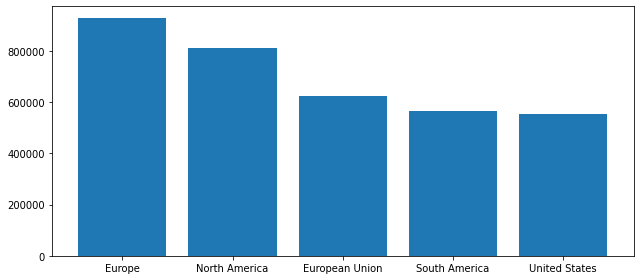

In [39]:
#plotar gráfico de barras com as maiores ocorrência de mortes
top_5_total_deaths = df.loc[df.date == '2021-04-04', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(9,4))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

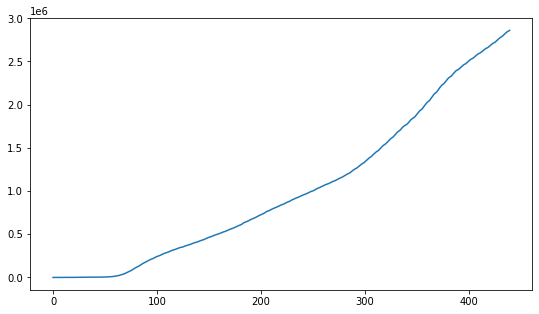

In [47]:
#gráfico de linha para mortes no Mundo(escala 1 pra 6)
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(9,5));

##Brasil

Após traçar um panorama mundial sobre o COVID-19, vamos focar nos dados do Brasil. 

* Para isso, criarei um DataFrame filtrando os dados da entrada Brasil do DF original.

In [50]:
#importando os dados para o DF e imprimindo na tela as 5 primeiras entradas
df_brasil = df.loc[df.location == 'Brazil'].copy()
df_brasil.head()

Timestamp('2021-04-05 00:00:00')

In [51]:
df_brasil.date.max()

Timestamp('2021-04-05 00:00:00')

###No linha de dódigo acima temos como saída a data final do DataFrame até o momento da criação desse artigo.

Podemos verificar através do código abaixo quando foi a primeira morte confirmada no Brasil. 

In [71]:
df_brasil.loc[df_brasil['new_deaths'] == 1.0]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10222,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [95]:
#identificando quantos dias demorou para registrarmos a primeira morte, 
#considerando o primeiro caso confirmado de Covid no Brasil
df_brasil.loc[df_brasil['new_cases'] == 1].head(1)
print(first_case.date);

10202   2020-02-26
Name: date, dtype: datetime64[ns]


O primeiro caso foi registrado em **26 de fevereiro de 2020**.

Houve um gap de __20 dias__ do primeiro caso ao primeiro óbito pela doença.